In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

# working with dates in pandas

In [3]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


Date  Fatalities
0  09/17/1908         1.0
1  07/12/1912         5.0
2  08/06/1913         1.0
3  09/09/1913        14.0
4  10/17/1913        30.0

In [4]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.2+ KB


In [6]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [7]:
df.head()

Date  Fatalities
0 1908-09-17         1.0
1 1912-07-12         5.0
2 1913-08-06         1.0
3 1913-09-09        14.0
4 1913-10-17        30.0

In [8]:
# pd.to_datetime(df.Date)
df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [9]:
df.head(1)

Date  Fatalities
0 1908-09-17         1.0

In [20]:
#with format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


Date  Fatalities
0 1908-09-17         1.0
1 1912-07-12         5.0
2 1913-08-06         1.0
3 1913-09-09        14.0
4 1913-10-17        30.0

In [19]:
print(dir(df['Date'].dt))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_add_delegate_accessors', '_constructor', '_delegate_method', '_delegate_property_get', '_delegate_property_set', '_dir_additions', '_dir_deletions', '_freeze', '_get_values', '_hidden_attrs', '_parent', '_reset_cache', 'ceil', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'floor', 'freq', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'microsecond', 'minute', 'month', 'month_name', 'nanosecond', 'normalize', 'quarter', 'round', 'second', '

In [21]:
df['Date'].dt.day_of_week

0       3
1       4
2       2
3       1
4       4
       ..
5263    2
5264    1
5265    0
5266    6
5267    0
Name: Date, Length: 5256, dtype: int64

In [29]:
# date as index
df_index = df.set_index('Date').sort_index()
df_index

Fatalities
Date                  
1908-09-17         1.0
1912-07-12         5.0
1913-08-06         1.0
1913-09-09        14.0
1913-10-17        30.0
...                ...
2009-05-20        98.0
2009-05-26         4.0
2009-06-01       228.0
2009-06-07         1.0
2009-06-08        13.0

[5256 rows x 1 columns]

In [28]:
# Filter by date
df_index.loc['2000-05-10':'2003-08']

Fatalities
Date                  
2000-05-10         6.0
2000-05-17         3.0
2000-05-21        19.0
2000-05-25         1.0
2000-05-25         1.0
...                ...
2003-08-04         2.0
2003-08-08         1.0
2003-08-20        20.0
2003-08-24        21.0
2003-08-26         2.0

[236 rows x 1 columns]

# Rolling Filters

In [30]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

Fatalities
Date                  
1908-09-30         1.0
1908-10-31         0.0
1908-11-30         0.0
1908-12-31         0.0
1909-01-31         0.0

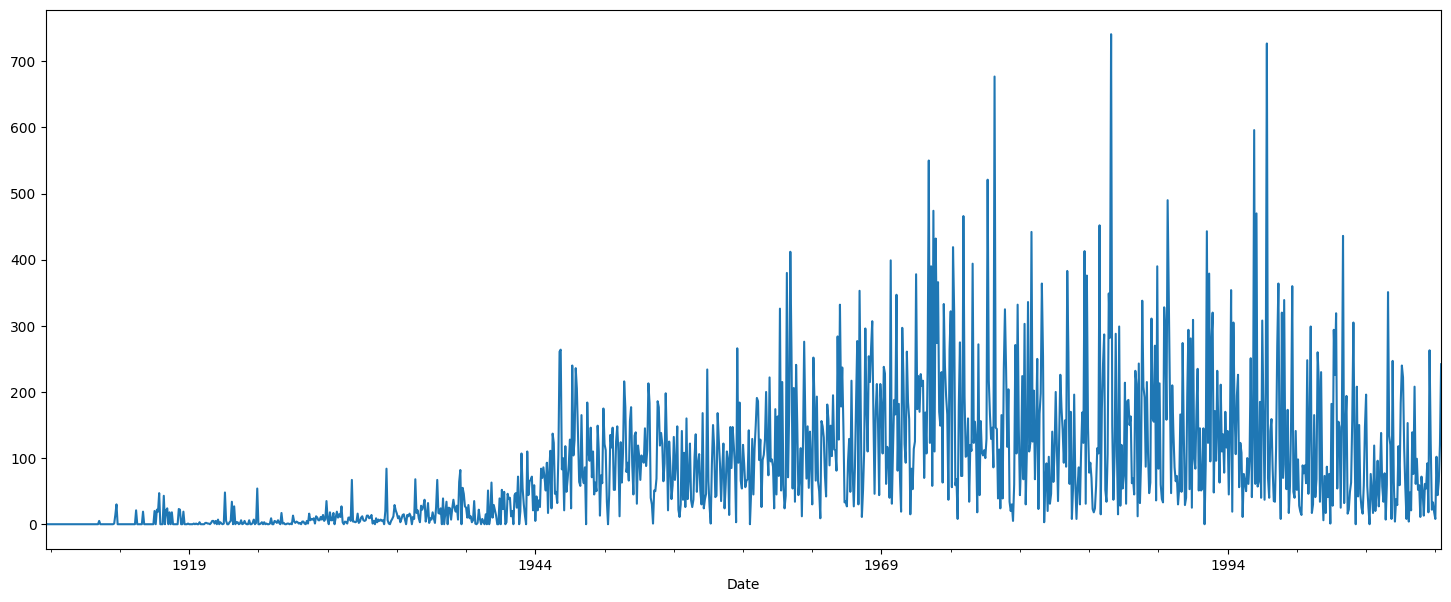

In [34]:
# Plot without noise treatment with rolling filter
plt.figure(figsize=(18,7))
df_monthly.Fatalities.plot();

In [35]:
df_monthly.Fatalities.rolling(3).mean()

Date
1908-09-30           NaN
1908-10-31           NaN
1908-11-30      0.333333
1908-12-31      0.000000
1909-01-31      0.000000
                 ...    
2009-02-28     42.666667
2009-03-31     51.333333
2009-04-30     70.333333
2009-05-31     76.333333
2009-06-30    142.333333
Freq: M, Name: Fatalities, Length: 1210, dtype: float64

In [39]:
@interact(window_size=(12,121,12))
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(IntSlider(value=60, description='window_size', max=121, min=12, step=12), Output()), _do…

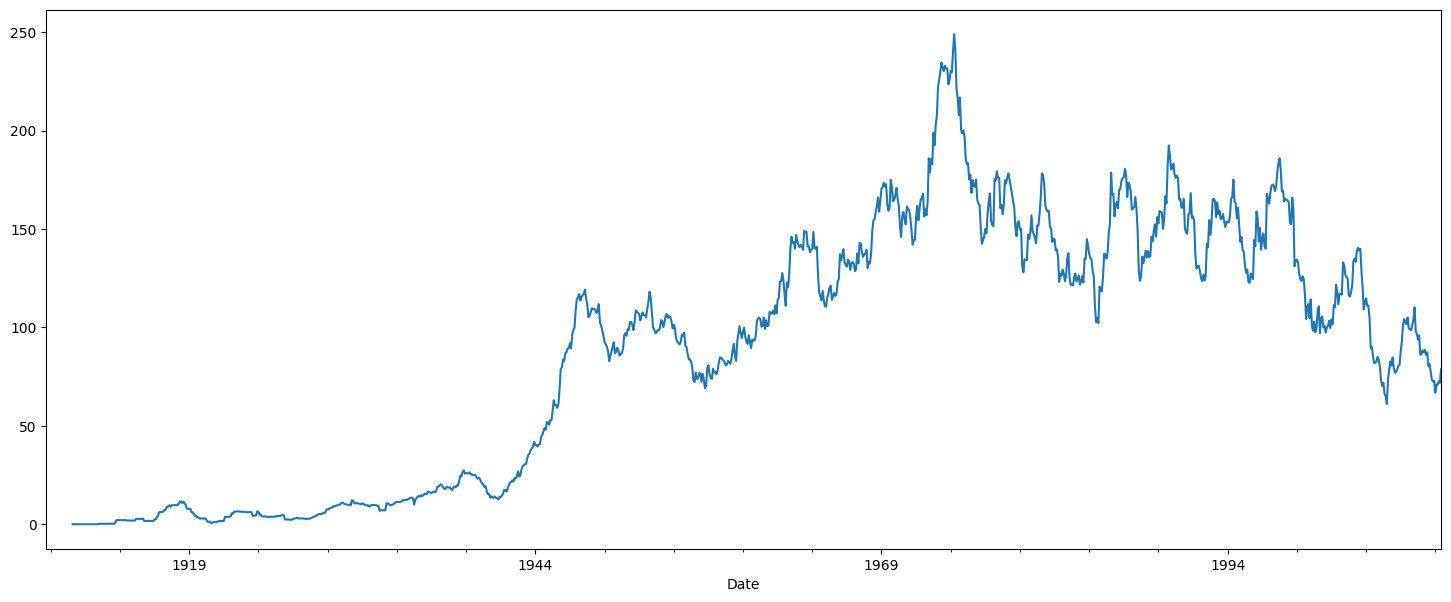

In [40]:
rolling_mean(24)